<a href="https://colab.research.google.com/github/SultanDaffaN/portfolio-sultan/blob/main/House_price_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
# import libraries needed
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Data

In [2]:
house_df = pd.read_csv('/content/drive/MyDrive/Portfolio/Portfolio 3/dataset_harga_rumah.csv',low_memory = False)

# EDA

In [3]:
# get first view about data
house_df.head()

,diposting_oleh,sedang_pembangunan,disetujui_pemerintah,total_ruangan,tipe_a_atau_b,kaki_persegi,siap_pindah,dijual_kembali,alamat,longitude,latitude,harga
0,Owner,0.0,0,2.0,tipe_a,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0.0,0,2.0,tipe_a,1275.0,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0.0,0,2.0,tipe_a,933.1597222,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0.0,1,2.0,tipe_a,929.9211427,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1.0,0,2.0,tipe_a,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [4]:
house_df.tail()

,diposting_oleh,sedang_pembangunan,disetujui_pemerintah,total_ruangan,tipe_a_atau_b,kaki_persegi,siap_pindah,dijual_kembali,alamat,longitude,latitude,harga
29446,Owner,0.0,0,3.0,tipe_a,2500.0,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0.0,0,2.0,tipe_a,769.2307692,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0.0,0,2.0,tipe_a,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0.0,0,2.0,tipe_a,927.0790093,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0
29450,Dealer,0.0,1,2.0,tipe_a,896.7741935,1,1,"Jagatpura,Jaipur",26.832353,75.841749,27.8


In [5]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   diposting_oleh        29451 non-null  object 
 1   sedang_pembangunan    27476 non-null  float64
 2   disetujui_pemerintah  29451 non-null  int64  
 3   total_ruangan         28071 non-null  float64
 4   tipe_a_atau_b         29451 non-null  object 
 5   kaki_persegi          27765 non-null  object 
 6   siap_pindah           29451 non-null  object 
 7   dijual_kembali        29451 non-null  object 
 8   alamat                27436 non-null  object 
 9   longitude             29451 non-null  float64
 10  latitude              26008 non-null  float64
 11  harga                 29451 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 2.7+ MB


In [6]:
house_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sedang_pembangunan,27476.0,0.179684,0.383931,0.000000,0.000000,0.00000,0.000000,1.000000
disetujui_pemerintah,29451.0,0.317918,0.465675,0.000000,0.000000,0.00000,1.000000,1.000000
total_ruangan,28071.0,2.392220,0.882229,1.000000,2.000000,2.00000,3.000000,20.000000
longitude,29451.0,21.300255,6.205306,-37.713008,18.452663,20.75000,26.900926,59.912884
latitude,26008.0,76.820157,10.697823,-121.761248,73.798100,77.32633,77.943705,152.962676
harga,29451.0,142.898746,656.880713,0.250000,38.000000,62.00000,100.000000,30000.000000


In [7]:
house_df.describe(include=object)

,diposting_oleh,tipe_a_atau_b,kaki_persegi,siap_pindah,dijual_kembali,alamat
count,29451,29451,27765,29451,29451,27436
unique,3,2,18115,9,5,6648
top,Dealer,tipe_a,1000.0,1,1,"Zirakpur,Chandigarh"
freq,18291,29427,446,21363,23610,473


In [10]:
# Shape of the dataset
print('Dataset has', house_df.shape[0], 'rows and', house_df.shape[1], 'columns')

Dataset has 29451 rows and 12 columns


In [11]:
house_df.shape

(29451, 12)

# Data Cleansing

## Handling Duplicates

In [14]:
# Check Duplicated data
print('Duplicated data:', house_df.duplicated().sum())

Duplicated data: 120


In [15]:
# Drop Duplicated Data
house_df.drop_duplicates(keep=False, inplace=True)

In [16]:
# Check Duplicated data
print('Duplicated data:', house_df.duplicated().sum())

Duplicated data: 0


## Handling Wrong Values

### diposting_oleh

In [18]:
# Counts Unique Values
house_df['diposting_oleh'].value_counts()

Dealer     18102
Owner      10496
Builder      618
Name: diposting_oleh, dtype: int64

There are no wrong values in this column

### sedang_pembangunan

In [21]:
# Counts Unique Values
house_df['sedang_pembangunan'].value_counts()

0.0    22358
1.0     4885
Name: sedang_pembangunan, dtype: int64

There are no wrong values in this column

### disetujui_pemerintah

In [22]:
# Counts Unique Values
house_df['disetujui_pemerintah'].value_counts()

0    19953
1     9263
Name: disetujui_pemerintah, dtype: int64

There are no wrong values in this column

### total_ruangan

In [23]:
# Counts Unique Values
house_df['total_ruangan'].value_counts()

2.0     12585
3.0      9967
1.0      3389
4.0      1624
5.0       181
6.0        48
7.0        11
8.0        10
20.0        4
10.0        4
15.0        4
12.0        3
9.0         3
13.0        1
17.0        1
11.0        1
Name: total_ruangan, dtype: int64

There are no wrong values in this column

### tipe_a_atau_b

In [24]:
# Counts Unique Values
house_df['tipe_a_atau_b'].value_counts()

tipe_a    29192
tipe_b       24
Name: tipe_a_atau_b, dtype: int64

There are no wrong values in this column

### kaki_persegi

In [25]:
# Counts Unique Values
house_df['kaki_persegi'].value_counts()

1000.0               438
1250.0               262
800.0                188
1200.0               164
testes               161
                    ... 
639.9250819            1
932.0905459            1
762.9616785000001      1
1684.956947            1
896.7741935            1
Name: kaki_persegi, Length: 18056, dtype: int64

There are some wrong values in this column for example 'testes'. The values in this column should contain only numbers. To handle this issue, I will convert all non-numerical values to null values.

In [26]:
# Convert wrong values to null values
house_df['kaki_persegi'] = house_df['kaki_persegi'].apply(pd.to_numeric, args=('coerce',))

In [27]:
# Counts Unique Values
house_df['kaki_persegi'].value_counts()

1000.000000    438
1250.000000    262
800.000000     188
1200.000000    164
1600.000000    113
              ... 
1099.585062      1
1750.171585      1
1334.141904      1
1754.470759      1
896.774194       1
Name: kaki_persegi, Length: 18049, dtype: int64

### siap_pindah

In [28]:
# Counts Unique Values
house_df['siap_pindah'].value_counts()

1         21182
0          4656
1-1-1-      522
testes      493
awa         484
a           478
salah       473
benar       469
asik        459
Name: siap_pindah, dtype: int64

The values in this column must contain either 1 or 0. But there are some values that are neither 1 nor 0. Therefore, I'll fix the wrong values.

In [29]:
# Rename for value: [1-1-1-, benar, salah]
house_df['siap_pindah'] = house_df['siap_pindah'].replace('1-1-1-', '1')
house_df['siap_pindah'] = house_df['siap_pindah'].replace('benar', '1')
house_df['siap_pindah'] = house_df['siap_pindah'].replace('salah', '0')

house_df['siap_pindah'].value_counts()

1         22173
0          5129
testes      493
awa         484
a           478
asik        459
Name: siap_pindah, dtype: int64

In this case, I am assuming that the value '1-1-1-' is a typo of '1' and I am also assuming that 'benar' should be '1' and 'salah' should be '0'.

In [30]:
# Fixing other wrong values using mode
house_df['siap_pindah'] = house_df['siap_pindah'].replace('testes', '1')
house_df['siap_pindah'] = house_df['siap_pindah'].replace('awa', '1')
house_df['siap_pindah'] = house_df['siap_pindah'].replace('a', '1')
house_df['siap_pindah'] = house_df['siap_pindah'].replace('asik', '1')

house_df['siap_pindah'].value_counts()

1    24087
0     5129
Name: siap_pindah, dtype: int64

After that, I replace the other data with wrong values using the mode values from the data.

### dijual_kembali

In [31]:
# Counts Unique Values
house_df['dijual_kembali'].value_counts()

1                   23407
0                    1776
SALAH                1360
Semangat Dek         1359
Aku paling benar     1314
Name: dijual_kembali, dtype: int64

The values in this column must contain either 1 or 0. But there are some values that are neither 1 nor 0. Therefore, I'll fix the wrong values.

In [32]:
# Fixing wrong values
house_df['dijual_kembali'] = house_df['dijual_kembali'].replace('SALAH', '0')
house_df['dijual_kembali'] = house_df['dijual_kembali'].replace('Semangat Dek', '1')
house_df['dijual_kembali'] = house_df['siap_pindah'].replace('Aku paling benar', '1')

house_df['dijual_kembali'].value_counts()

1    24087
0     5129
Name: dijual_kembali, dtype: int64

Same as siap_pindah, there are many wrong values in the data. I'm assuming that 'SALAH' should be '0'. As for the other values, I changed them using the mode value from the data, which is '1'.

### longitude, latitude, harga

In [37]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29216 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   diposting_oleh        29216 non-null  object 
 1   sedang_pembangunan    27243 non-null  float64
 2   disetujui_pemerintah  29216 non-null  int64  
 3   total_ruangan         27836 non-null  float64
 4   tipe_a_atau_b         29216 non-null  object 
 5   kaki_persegi          26534 non-null  float64
 6   siap_pindah           29216 non-null  object 
 7   dijual_kembali        29216 non-null  object 
 8   alamat                27203 non-null  object 
 9   longitude             29216 non-null  float64
 10  latitude              25775 non-null  float64
 11  harga                 29216 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 2.9+ MB


There are no wrong values in longitude, latitude, and harga. As we can see, the data type of those columns are float.

## Handling Null Values

In [39]:
# Checking null values
house_df.isnull().sum(axis = 0)

diposting_oleh             0
sedang_pembangunan      1973
disetujui_pemerintah       0
total_ruangan           1380
tipe_a_atau_b              0
kaki_persegi            2682
siap_pindah                0
dijual_kembali             0
alamat                  2013
longitude                  0
latitude                3441
harga                      0
dtype: int64

There are null values in sedang_pembangunan, total_ruangan, kaki_persegi, alamat, and latitude.

### sedang_pembangunan

In [40]:
# Imputing Missing values with mode
house_df['sedang_pembangunan'] = house_df['sedang_pembangunan'].fillna(0)

Because this column is a categorical variable, I imputed it using the mode value from the data.

In [42]:
# Checking null values
print('Null values in sedang_pembangunan:',house_df['sedang_pembangunan'].isnull().sum(axis = 0))

Null values in sedang_pembangunan: 0


### total_ruangan

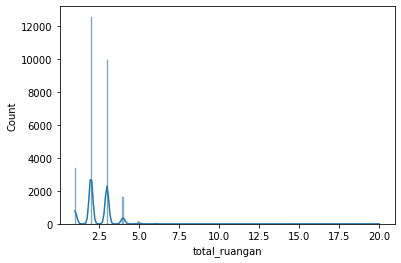

In [44]:
sns.histplot(data=house_df, x="total_ruangan", kde=True)

I will imputate the total_ruangan data. In determining imputation, I need to look at the distribution of the data. It can be seen here that the total_ruangan data is not normally distributed. So, I'll impute this data using the mode of the data

In [45]:
house_df['total_ruangan'] = house_df['total_ruangan'].fillna(house_df['total_ruangan'].median())

In [46]:
# Checking null values
print('Null values in total_ruangan:',house_df['total_ruangan'].isnull().sum(axis = 0))

Null values in total_ruangan: 0


### kaki_persegi

In [51]:
print('Mean kolom kaki_persegi:', house_df['kaki_persegi'].mean())
print('Median kolom kaki_persegi:', house_df['kaki_persegi'].median())
print('Mode kolom kaki_persegi:', house_df['kaki_persegi'].mode())

Mean kolom kaki_persegi: 12172.323594319627
Median kolom kaki_persegi: 1175.3625935
Mode kolom kaki_persegi: 0    1000.0
dtype: float64


Just like before, I have to look at the data distribution first before imputing the data. In the calculation above, it can be seen that the mode < median < mean. This shows that the distribution of data on kaki_persegi is a positive skew. Because the data is not normally distributed, I imputed it with the median value.

In [52]:
# Imputing missing values using median
house_df['kaki_persegi'] = house_df['kaki_persegi'].fillna(house_df['kaki_persegi'].median())

In [54]:
# Checking null values
print('Null values in kaki_persegi:',house_df['kaki_persegi'].isnull().sum(axis = 0))

Null values in kaki_persegi: 0


### alamat

In imputing data for the alamat column, I use the geoPy library. But before that, I found that the latitude and longitude columns are reversed.

In [62]:
# Check the first value from alamat, longitude, and latitude
house_df[['alamat', 'longitude', 'latitude']].iloc[0]

alamat       Ksfc Layout,Bangalore
longitude                 12.96991
latitude                  77.59796
Name: 0, dtype: object

In [63]:
# Checking the longitude and latitude
from geopy.geocoders import Nominatim
from geopy.point import Point

geolocator = Nominatim(user_agent="sultan")

alamat = house_df['alamat'].iloc[0]

location = geolocator.geocode(alamat)
print('alamat:', alamat)
print('longitude:', location.longitude)
print('latitude:', location.latitude)

alamat: Ksfc Layout,Bangalore
longitude: 77.6344298
latitude: 13.0164987


We can see that longitude and latitude are reversed. So, I need to fix that first

In [64]:
# Changing the column name between longitude and latitude
house_df.rename(columns = {'latitude':'old_latitude'}, inplace=True)
house_df.rename(columns = {'longitude':'latitude'}, inplace=True)
house_df.rename(columns = {'old_latitude':'longitude'}, inplace=True)
house_df[['alamat', 'longitude', 'latitude']].head()

,alamat,longitude,latitude
0,"Ksfc Layout,Bangalore",77.597960,12.969910
1,"Vishweshwara Nagar,Mysore",76.644605,12.274538
2,"Jigani,Bangalore",77.632191,12.778033
3,"Sector-1 Vaishali,Ghaziabad",77.344500,28.642300
4,"New Town,Kolkata",88.484911,22.592200


After that, I'll impute alamat using geoPy.

In [65]:
# Function for imputing alamat
from geopy.geocoders import Nominatim
from geopy.point import Point

geolocator = Nominatim(user_agent="sultan")

def imputing_alamat(row):
  address = geolocator.reverse(Point(row['latitude'], row['longitude']), timeout=10000)
  return ','.join(str(address).split(',')[:2])

In [66]:
# Imputing alamat based on longitude and latitude
house_df['alamat'] = house_df.apply(
                                      lambda row: imputing_alamat(row) if pd.isna(row['alamat']) and pd.notna(row['longitude']) else row['alamat'],
                                      axis=1
                                    )

In [67]:
# Checking null values
print('Null values in alamat:',house_df['alamat'].isnull().sum(axis = 0))

Null values in alamat: 229


It can be seen here that the null values have been reduced leaving rows which have null values in the address column as well as the longitude.

### longitude

In [68]:
# Function for imputing longitude
geolocator = Nominatim(user_agent="sultan")

def imputing_longitude(row):
  location = geolocator.geocode(row['alamat'], timeout=10000)
  if location is not None:
    return location.longitude
  return row['longitude']

In [69]:
# Imputing longitude based on alamat column
house_df['longitude'] = house_df.apply(
                                      lambda row: imputing_longitude(row) if pd.isna(row['longitude']) and pd.notna(row['alamat']) else row['longitude'],
                                      axis=1
                                    )

In [70]:
# Checking null values
print('Null values in longitude:',house_df['longitude'].isnull().sum(axis = 0))

Null values in longitude: 1225


You can see here that the null values have been greatly reduced leaving rows which have null values in the address & longitude fields (which geoPy can no longer handle) and null values which geoPy cannot find (not all addresses in this data can be found by geoPy)

In [71]:
# Checking null values
house_df.isnull().sum(axis = 0)

diposting_oleh             0
sedang_pembangunan         0
disetujui_pemerintah       0
total_ruangan              0
tipe_a_atau_b              0
kaki_persegi               0
siap_pindah                0
dijual_kembali             0
alamat                   229
latitude                   0
longitude               1225
harga                      0
dtype: int64

There are only a few missing values in this data and I want to see the percentage of missing values here to account for dropping the missing values.

In [72]:
# Checking percentage of current missing values 
row_missing_values = sum([True for idx,row in house_df.iterrows() if any(row.isnull())])
missing_values_percentage = row_missing_values/len(house_df)*100

print('The percentage of missing values is {:.2f}% of the total data rows'.format(missing_values_percentage))

The percentage of missing values is 4.19% of the total data rows


It can be seen here that the missing values are only 4.19% of the total data (and this is relatively small). That way, I'll be dropping the remaining missing values.

In [73]:
# Drop remaining missing values
house_df = house_df.dropna()

In [74]:
# Checking null values
house_df.isnull().sum(axis = 0)

diposting_oleh          0
sedang_pembangunan      0
disetujui_pemerintah    0
total_ruangan           0
tipe_a_atau_b           0
kaki_persegi            0
siap_pindah             0
dijual_kembali          0
alamat                  0
latitude                0
longitude               0
harga                   0
dtype: int64

In [76]:
house_df.shape

(27991, 12)

## Handling Outliers

In [75]:
# Viewing outliers in the dataset using IQR

# stores numerical columns
cols_num = ['total_ruangan', 'kaki_persegi', 'longitude', 'latitude', 'harga']

# Q1 and !3
Q1 = house_df.quantile(0.25)
Q3 = house_df.quantile(0.75)

# Calculates RUB and RLB
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

# Menampilkan banyaknya outlier pada atribut
outliers = (house_df < lower_limit) | (house_df > upper_limit)
print ("Outliers in each column:")
print(outliers.sum())

Outliers in each column:
alamat                     0
dijual_kembali             0
diposting_oleh             0
disetujui_pemerintah       0
harga                   2938
kaki_persegi            1854
latitude                 138
longitude               2797
sedang_pembangunan      4674
siap_pindah                0
tipe_a_atau_b              0
total_ruangan            253
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  app.launch_new_instance()


In this case, I will remove all outliers to get the best result for my machine learning model

In [77]:
# Removing Outliers
house_df = house_df[~((house_df[cols_num] < lower_limit) | (house_df[cols_num] > upper_limit)).any(axis=1)]

house_df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


(21698, 12)

## Fixing data type 

In [80]:
house_df.head()

,diposting_oleh,sedang_pembangunan,disetujui_pemerintah,total_ruangan,tipe_a_atau_b,kaki_persegi,siap_pindah,dijual_kembali,alamat,latitude,longitude,harga
0,Owner,0.0,0,2.0,tipe_a,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0.0,0,2.0,tipe_a,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0.0,0,2.0,tipe_a,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0.0,1,2.0,tipe_a,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
5,Owner,0.0,0,3.0,tipe_a,1250.000000,1,1,"South Chittoor,Kochi",10.033280,76.282571,42.0


In [79]:
house_df.dtypes

diposting_oleh           object
sedang_pembangunan      float64
disetujui_pemerintah      int64
total_ruangan           float64
tipe_a_atau_b            object
kaki_persegi            float64
siap_pindah              object
dijual_kembali           object
alamat                   object
latitude                float64
longitude               float64
harga                   float64
dtype: object

In this case, I will convert the columns that have binary values to integers because it's more appropriate. I also convert the total_ruangan type to an integer since there is no chance that total_ruangan has a decimal number.

In [81]:
# Convert to integer
col_to_int = ['sedang_pembangunan', 'total_ruangan', 'siap_pindah', 'dijual_kembali']

house_df[col_to_int] = house_df[col_to_int].astype(int)

In [82]:
house_df.head()

,diposting_oleh,sedang_pembangunan,disetujui_pemerintah,total_ruangan,tipe_a_atau_b,kaki_persegi,siap_pindah,dijual_kembali,alamat,latitude,longitude,harga
0,Owner,0,0,2,tipe_a,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,tipe_a,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,tipe_a,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,tipe_a,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
5,Owner,0,0,3,tipe_a,1250.000000,1,1,"South Chittoor,Kochi",10.033280,76.282571,42.0


In [83]:
house_df.dtypes

diposting_oleh           object
sedang_pembangunan        int64
disetujui_pemerintah      int64
total_ruangan             int64
tipe_a_atau_b            object
kaki_persegi            float64
siap_pindah               int64
dijual_kembali            int64
alamat                   object
latitude                float64
longitude               float64
harga                   float64
dtype: object

# Data Preprocessing

## Feature Selection

Before building the ML model, there are several processes that we need to do, including dividing the column into features and targets and selecting features. We decide that the columns to feature are all columns except the alamat column. This is because the alamat feature has been represented by the longitude and latitude columns so that if we use the alamat column, redundant information occurs. Our target column is the harga column. This is because we want to make price predictions using the information in the other columns.

In [84]:
# Split feature and target columns
X = house_df.drop(['harga', 'alamat'], axis=1)
y = house_df['harga']

## One-Hot Encoding for Categorical columns

In [85]:
# one-hot encoding for diposting_oleh and tipe_a_atau_b
X = pd.get_dummies(X, drop_first=True)
X.head()

,sedang_pembangunan,disetujui_pemerintah,total_ruangan,kaki_persegi,siap_pindah,dijual_kembali,latitude,longitude,diposting_oleh_Dealer,diposting_oleh_Owner,tipe_a_atau_b_tipe_b
0,0,0,2,1300.236407,1,1,12.969910,77.597960,0,1,0
1,0,0,2,1275.000000,1,1,12.274538,76.644605,1,0,0
2,0,0,2,933.159722,1,1,12.778033,77.632191,0,1,0
3,0,1,2,929.921143,1,1,28.642300,77.344500,0,1,0
5,0,0,3,1250.000000,1,1,10.033280,76.282571,0,1,0


## Standardization for Numerical columns

In [86]:
from sklearn.preprocessing import StandardScaler

cols = ['kaki_persegi', 'latitude', 'longitude']

# Standardization for kaki_persegi, latitude, and longitude
scaler = StandardScaler()
scaler.fit(X[cols])

# Standardization
X[cols] = scaler.transform(X[cols])

X.head()

,sedang_pembangunan,disetujui_pemerintah,total_ruangan,kaki_persegi,siap_pindah,dijual_kembali,latitude,longitude,diposting_oleh_Dealer,diposting_oleh_Owner,tipe_a_atau_b_tipe_b
0,0,0,2,0.361788,1,1,-1.291784,0.520099,0,1,0
1,0,0,2,0.298306,1,1,-1.403301,0.132232,1,0,0
2,0,0,2,-0.561593,1,1,-1.322556,0.534025,0,1,0
3,0,1,2,-0.569740,1,1,1.221591,0.416980,0,1,0
5,0,0,3,0.235418,1,1,-1.762731,-0.015059,0,1,0


## Split Train Test Data

In [87]:
from sklearn.model_selection import train_test_split

# Split training dan validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=101)

# ML Model

## Random Forest Regressor

In [97]:
from sklearn.ensemble import RandomForestRegressor

# Training model using random forest regressor
rfr = RandomForestRegressor(verbose=1)
rfr.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.7s finished


RandomForestRegressor(verbose=1)

In [98]:
# Predicting validation set
y_predict = rfr.predict(X_val)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


In [99]:
# Evaluating the Model

import math 
from sklearn import metrics

# Nilai MSE, MAE, RMSE, dan R2 Square
print("MSE:", metrics.mean_squared_error(y_val, y_predict))
print("MAE:", metrics.mean_absolute_error(y_val, y_predict))
print("RMSE: ", math.sqrt(metrics.mean_squared_error(y_val, y_predict))) 
print("R-squared:", metrics.r2_score(y_val, y_predict))

MSE: 469.4480031566668
MAE: 14.234663842401343
RMSE:  21.666748790639236
R-squared: 0.7028020138278996


In [100]:
rfr.feature_importances_

array([6.99392684e-03, 1.27938497e-02, 8.37706111e-02, 3.20182479e-01,
       4.32799698e-03, 4.25497644e-03, 2.46145348e-01, 2.02568909e-01,
       1.17891385e-01, 9.31002205e-04, 1.39516077e-04])

In [101]:
# view the feature scores

feature_scores = pd.Series(rfr.feature_importances_, index=X_train.columns) \
                           .sort_values(ascending=False)

feature_scores

kaki_persegi             0.320182
latitude                 0.246145
longitude                0.202569
diposting_oleh_Dealer    0.117891
total_ruangan            0.083771
disetujui_pemerintah     0.012794
sedang_pembangunan       0.006994
siap_pindah              0.004328
dijual_kembali           0.004255
diposting_oleh_Owner     0.000931
tipe_a_atau_b_tipe_b     0.000140
dtype: float64

Text(0, 0.5, 'Features')

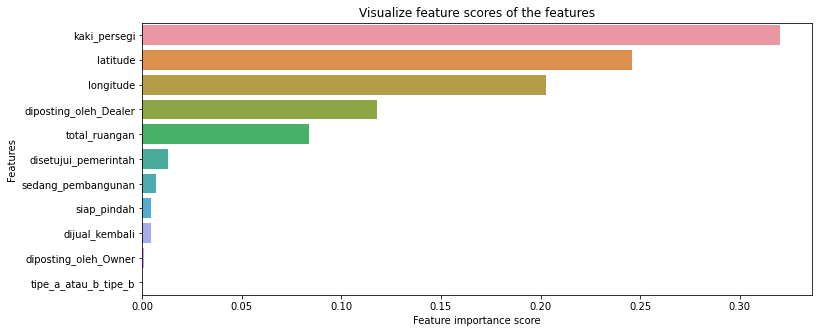

In [102]:
# Visualize the feature scores

fig, ax = plt.subplots(figsize=(12, 5))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=house_df)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")

## KNN Regressor

In [91]:
from sklearn.neighbors import KNeighborsRegressor

# training model using KNN Regressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [92]:
# predicting validation set
y_predict = knn.predict(X_val)

In [93]:
# Evaluating the model

import math 
from sklearn import metrics

# Nilai MSE, MAE, RMSE, dan R2 Square
print("MSE:", metrics.mean_squared_error(y_val, y_predict))
print("MAE:", metrics.mean_absolute_error(y_val, y_predict))
print("RMSE: ", math.sqrt(metrics.mean_squared_error(y_val, y_predict))) 
print("R-squared:", metrics.r2_score(y_val, y_predict))

MSE: 741.1353632114696
MAE: 18.76150291858679
RMSE:  27.223801410006455
R-squared: 0.5308022700144084


## Neural Network Regressor

In [94]:
from sklearn.neural_network import MLPRegressor

# training model using Neural Network Regressor
mlp = MLPRegressor(random_state=1, max_iter=500)
mlp.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPRegressor(max_iter=500, random_state=1)

In [95]:
# predicting validation set
y_predict = mlp.predict(X_val)

In [96]:
# Evaluating the model

import math 
from sklearn import metrics

# Nilai MSE, MAE, RMSE, dan R2 Square
print("MSE:", metrics.mean_squared_error(y_val, y_predict))
print("MAE:", metrics.mean_absolute_error(y_val, y_predict))
print("RMSE: ", math.sqrt(metrics.mean_squared_error(y_val, y_predict))) 
print("R-squared:", metrics.r2_score(y_val, y_predict))

MSE: 748.320961282155
MAE: 19.81670231023775
RMSE:  27.355455786408587
R-squared: 0.5262532139705228


# Conclusions

After building several machine learning models, I get that the best model is Random Forest Regressor with the lowest MSE, MAE, and RMSE. Random Forest Regressor model also get the highest R-squared, **0.7**